# Customer Retention: Online Retail

### Project Goal 

To analyze customer purchasing behavior and measure customer retention using Cohort Analysis.

### Methodology 

The analysis segments customers into monthly cohorts based on their first purchase `CohortMonth` and tracks their subsequent activity over time `CohortIndex`. Key metrics calculated across these cohorts include:

- Customer retention rates.
- Average purchase quantity.

### Dataset Summary

- **Type:** Transactional, multivariate, sequential, time-series  
- **Time period:** 01/12/2010 – 09/12/2011  
- **Domain:** UK-based non-store online retail, mainly selling unique gifts; many customers are wholesalers  
- **Instances:** 541,909 transactions  
- **Features:** 8  
  - `InvoiceNo` (transaction ID)  
  - `StockCode` (product ID)  
  - `Description` (product name)  
  - `Quantity` (units per transaction)  
  - `InvoiceDate` (date & time of transaction)  
  - `UnitPrice` (price per unit, £)  
  - `CustomerID` (customer ID)  
  - `Country` (customer location)  
- **Feature types:** Integer, Real, Categorical, Date  
- **Missing values:** None   
- **Reference:** Chen, Laing, Guo (2012), *Journal of Database Marketing and Customer Strategy Management*

### Insight

- Even though retention declines (fewer returning customers), the customers who stay tend to buy in similar or slightly higher quantities, suggesting loyalty among active buyers.

### Recommendations

- Prioritize first-time customer retention through onboarding, engagement, and targeted follow-ups.
- Encourage repeat purchases with loyalty programs, promotions, or personalized offers.
- Upsell or bundle products to maximize value from returning customers who maintain or increase purchase quantities.
- Segment and target active buyers for tailored marketing based on purchase patterns.


---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Load Data

In [2]:
df_online_retail = pd.read_excel("OnlineRetail.xlsx", index_col=0)

In [3]:
online = df_online_retail.copy()

In [4]:
online.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


---

### Cohort Analysis

#### Customer Segmentation

In [5]:
# Function that truncates a given date object to a first day of the month.
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [6]:
online["InvoiceMonth"] = online["InvoiceDate"].apply(get_month)

In [7]:
grouping = online.groupby("CustomerID")["InvoiceMonth"]

In [8]:
# Assign the smallest `InvoiceMonth` value to each customer
online["CohortMonth"] = grouping.transform("min")

In [9]:
online.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
InvoiceNo,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [10]:
# Helper function which will extract integer values 
# of the year, month and day from a datetime() object
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

Calculate the number of months between any transaction and the first transaction for each customer. 

In [11]:
invoice_year, invoice_month, _ = get_date_int(online, "InvoiceMonth")
cohort_year, cohort_month, _ = get_date_int(online, "CohortMonth")

In [12]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

Convert the total difference to months by multiplying the year difference by 12 and adding them together. "+1" in the end: so the first month is marked as 1 instead of 0 for easier interpretation.

In [13]:
online["CohortIndex"] = years_diff * 12 + months_diff + 1

In [14]:
online.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
InvoiceNo,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


---

### Count monthly active customers from each cohort

Create a groupby object with `CohortMonth` and `CohortIndex`.

In [15]:
grouping = online.groupby(["CohortMonth", "CohortIndex"])

Count number of customers in each group by applying pandas `nunique()` function

In [16]:
cohort_data = grouping["CustomerID"].apply(pd.Series.nunique)

Reset the index and create a pandas pivot with `CohortMonth` in the rows, `CohortIndex` in the columns, and `CustomerID` counts as values.

In [17]:
cohort_data = cohort_data.reset_index()

In [18]:
cohort_counts = cohort_data.pivot(index="CohortMonth",
                                 columns="CohortIndex",
                                 values="CustomerID")

In [19]:
cohort_counts

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

### Cohort Metrics

The retention measures how many customers from each of the cohort have returned in the subsequent months.  
Will calculate the ratio of how many of 1st column customers came back in the subsequent months which is the retention rate.

#### Calculate retention rate

1. Store the first column as `cohort_sizes`

In [20]:
cohort_sizes = cohort_counts.iloc[:,0]

2. Divide all values in he `cohort_counts` table by `cohort_sizes`. Set the `axis=0` to ensure that we divide along the row axis.

In [21]:
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [22]:
retention.round(3) * 100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Average Quantity

In [23]:
grouping = online.groupby(["CohortMonth", "CohortIndex"])

In [24]:
cohort_data = grouping["Quantity"].mean()

In [25]:
cohort_data = cohort_data.reset_index()

In [26]:
average_quantity = cohort_data.pivot(index="CohortMonth",
                                    columns="CohortIndex",
                                    values="Quantity")

In [27]:
average_quantity.round(1)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Unit Price

In [28]:
grouping = online.groupby(["CohortMonth", "CohortIndex"])

In [29]:
cohort_data = grouping["UnitPrice"].mean()

In [30]:
cohort_data = cohort_data.reset_index()

In [31]:
average_price = cohort_data.pivot(index="CohortMonth",
                                    columns="CohortIndex",
                                    values="UnitPrice")

In [32]:
average_price.round(2)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.21,3.18,3.20,3.59,2.93,4.97,3.18,3.22,3.50,3.03,3.30,2.83,2.76
2011-01-01,3.50,3.65,3.06,8.37,3.16,3.16,2.91,2.75,2.64,5.45,2.87,2.60,NaN
2011-02-01,3.34,4.45,4.80,3.15,2.99,2.79,2.81,3.21,2.89,2.94,3.22,NaN,NaN
2011-03-01,3.29,4.98,3.66,3.28,3.61,2.76,2.84,2.79,2.70,2.49,NaN,NaN,NaN
2011-04-01,3.42,3.96,3.31,2.68,3.02,2.86,2.89,2.80,2.61,NaN,NaN,NaN,NaN
2011-05-01,4.64,3.23,2.65,3.17,2.66,2.49,2.61,2.54,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.40,3.18,3.34,2.83,2.56,3.52,2.29,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.46,3.48,2.75,2.69,2.40,2.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.02,5.40,5.69,7.04,6.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

### Cohort Visualization

In [33]:
retention.index = retention.index.strftime("%Y-%m-%d")
average_quantity.index = average_quantity.index.strftime("%Y-%m-%d")

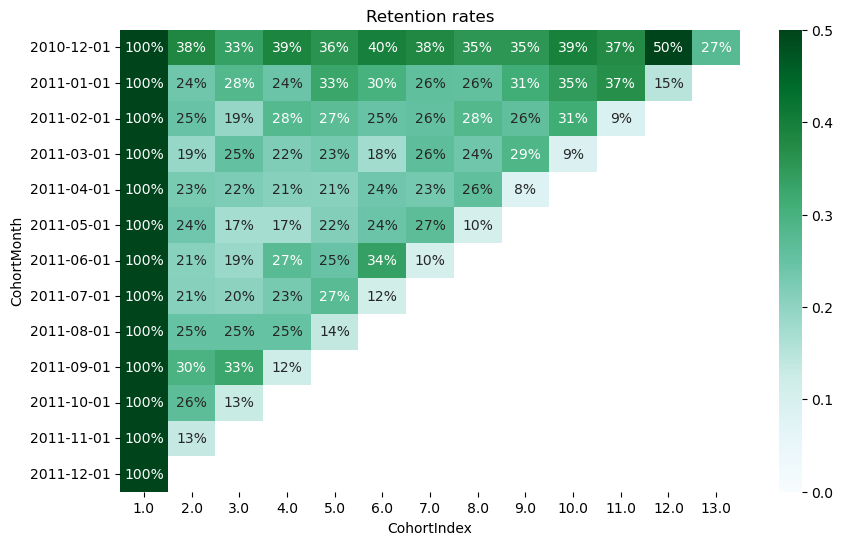

In [34]:
plt.figure(figsize=(10, 6))
plt.title("Retention rates")
sns.heatmap(data = retention,
           annot = True,
           fmt = ".0%",
           vmin = 0.0,
           vmax = 0.5,
           cmap = "BuGn")

plt.show()

#### Insights:

- **Retention declines** over time in all cohorts, **rarely exceeding 50%**.
- Most cohorts show **non-monotonic patterns**, with occasional increases after initial drops.
- Early months are critical, while later months see minimal repeat activity.

---

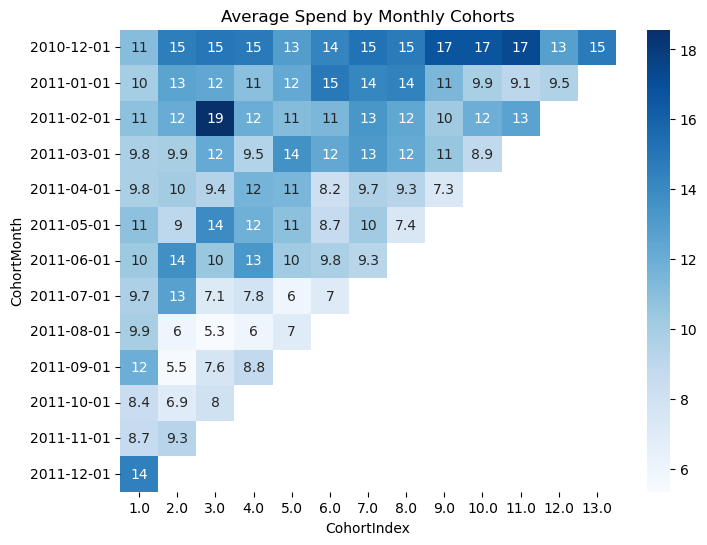

In [35]:
plt.figure(figsize=(8, 6))
plt.title("Average Spend by Monthly Cohorts")
sns.heatmap(data=average_quantity, annot=True, cmap="Blues")
plt.show()

#### Insights:

- Average purchase quantity per customer is fairly stable (8–16 units).
- Some cohorts increase over time, suggesting repeat buyers may order more.
- Fluctuations exist, but no clear downward trend; returning customers often maintain or increase their quantity.
- Early months are generally lower, indicating order size grows after the first purchase.

---